# <font color = lightcoral>Inference Testing
>    
### <font color = red> Non-Overlapping Windows

> From transformer models
>

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


---

# <font color = lightsteelblue> 4 Key Files

In [2]:
import pandas as pd
import time

data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'

################################## Part 1: Parsed Raw File ###################################

print("\n" + "*"*100)
print("********************** Part1 1: Parsed Raw File ******************************************")
print("*"*100 + "\n")

parsed_file =  f"{data_dir}/01.BGL.log_structured.csv"
parsed_file_df = pd.read_csv(parsed_file)
display(parsed_file_df.head())
print("Shape of Parsed Raw File:", parsed_file_df.shape)

######################### Part 2: Encoded File with Feature for Model Training  ######################

print("\n" + "*"*100)
print("********************** Part 2:  Input Data with Features ******************************************")
print("*"*100 + "\n")

encoded_feature_input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_mapping_master_FINAL.parquet"
encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
display(encoded_feature_input_file_df.iloc[:, :25].head())
print("Shape of Encoded File with Features:", encoded_feature_input_file_df.shape)

# ######################### Part 3: Event_ID to Template Mapping  #######################################

print("\n" + "*"*100)
print("********************** Part 3: Event_ID to Template Mapping ******************************************")
print("*"*100 + "\n")

eventid_template_file = f"{data_dir}/04.20240711_Template_to_EventID_Mapping_v1.00.csv"
eventid_template_df = pd.read_csv(eventid_template_file)
display(eventid_template_df.head())
print("Shape of Event_ID to Template Mapping:", eventid_template_df.shape)

# ######################### Part 4: Event_ID to Encoding Mapping  #######################################

print("\n" + "*"*100)
print("********************** Part 4:  Event_ID to Encoding Mapping ******************************************")
print("*"*100 + "\n")

eventid_encoding_file = f"{data_dir}/05.20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
eventid_encoding_df = pd.read_csv(eventid_encoding_file)
display(eventid_encoding_df.head())
print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)


****************************************************************************************************
********************** Part1 1: Parsed Raw File ******************************************
****************************************************************************************************



,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected


Shape of Parsed Raw File: (4713493, 13)

****************************************************************************************************
********************** Part 2:  Input Data with Features ******************************************
****************************************************************************************************



,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_1,EventId_2,EventId_3,EventId_4,EventId_5
0,0,Train,2005-06-03 16:00:00,0,0,6,228,6,0.171708,16,4,465,35431,913.0,0.012903,0,0.000000,0.171708,4895.0,18.0,228,228,228,228,228
1,1,Train,2005-06-03 16:05:00,1,0,2,987,2,0.598270,16,4,7,35433,465.0,0.285714,0,0.171708,0.426562,4257.0,19.0,729,987,987,987,987
2,2,Train,2005-06-03 16:10:00,2,0,6,399,18,0.655243,16,4,81,35431,7.0,0.222222,0,0.598270,0.056973,2756.0,23.0,734,430,504,95,95
3,3,Train,2005-06-03 16:15:00,3,0,5,328,6,1.039660,16,4,66,35431,81.0,0.090909,0,0.655243,0.384418,1532.0,25.0,987,987,987,987,328
4,4,Train,2005-06-03 16:25:00,5,0,4,399,3,0.895333,16,4,14,35433,66.0,0.214286,0,1.039660,-0.144328,633.0,28.0,95,504,504,399,399


Shape of Encoded File with Features: (14537, 35453)

****************************************************************************************************
********************** Part 3: Event_ID to Template Mapping ******************************************
****************************************************************************************************



,EventId,EventTemplate,Occurrences
0,3aa50e45,instruction cache parity error corrected,105924
1,b9250ad9,MidplaneSwitchController performing bit sparing on R<*>-M<*>-L<*>-U<*>-C bit <*>,964
2,fc5f0940,generating core.<*>,1706751
3,1840cbfe,"<*> ddr errors(s) detected and corrected on rank <*>, symbol <*>, bit <*>",33939
4,828a502b,<*> <*> <*> error(s) (dcr <*>) detected and corrected,5040


Shape of Event_ID to Template Mapping: (1000, 3)

****************************************************************************************************
********************** Part 4:  Event_ID to Encoding Mapping ******************************************
****************************************************************************************************



,EventId,EncodedValue
0,0025df56,0
1,0045c3a8,1
2,004a68ba,2
3,00980b01,3
4,00d49120,4


Shape of Event_ID to Encoding Mapping: (1000, 2)


---

# <font color = gold> Inference Testing - Flask App --> WORKS! --> v1.10

### <font color = tomato> Worked after adding flask route for /

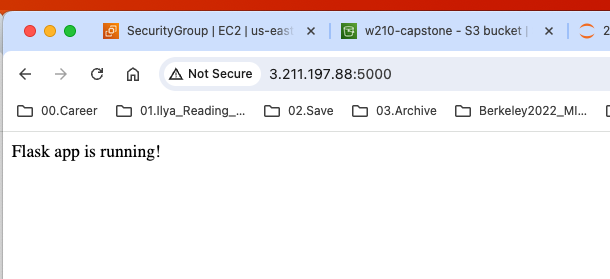

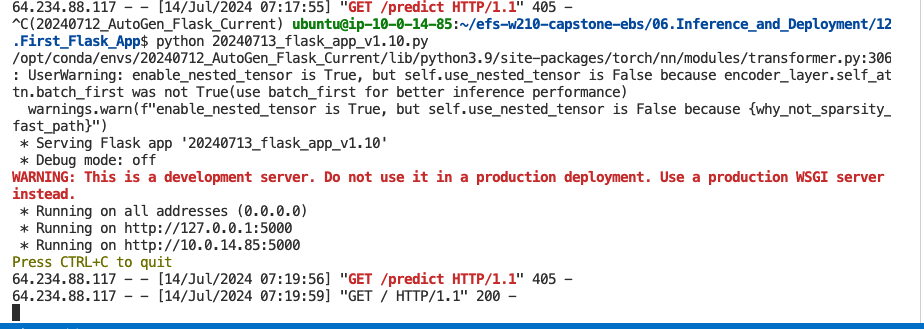

## Run


Enhanced Results:


,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count
0,11615,11637,11615,11634,11635,11636,11636,11637,0,0.0,11615,Test,2005-11-08 16:10:00,45506,0,1,68,0,0.000000,16,1,1,35433,8.0,0.000000,0,0.000000,0.000000,26.0,10.0
1,11638,11660,11638,11657,11658,11659,11659,11660,0,0.0,11638,Test,2005-11-08 23:00:00,45588,0,1,231,0,0.000000,23,1,1,35433,1.0,0.000000,0,0.000000,0.000000,6.0,11.0
2,11661,11683,11661,11680,11681,11682,11682,11683,1,0.0,11661,Test,2005-11-09 12:50:00,45754,0,1,231,0,0.000000,12,2,1,35433,1.0,0.000000,0,0.000000,0.000000,12.0,10.0
3,11684,11706,11684,11703,11704,11705,11705,11706,1,0.0,11684,Test,2005-11-09 18:45:00,45825,0,2,108,1,0.348832,18,2,9216,35433,2.0,0.000109,0,0.000000,0.348832,13887.0,19.0
4,11707,11729,11707,11726,11727,11728,11728,11729,1,0.0,11707,Test,2005-11-10 07:20:00,45976,0,5,201,15,0.419213,7,3,144,35432,489.0,0.104167,0,1.397314,-0.978100,1130.0,29.0
5,11730,11752,11730,11749,11750,11751,11751,11752,1,0.0,11730,Test,2005-11-10 19:05:00,46117,1,38,399,111,1.575391,19,3,278,35385,14.0,0.399281,0,1.351784,0.223607,335.0,61.0
6,11753,11775,11753,11772,11773,11774,11774,11775,0,0.0,11753,Test,2005-11-11 04:45:00,46233,0,5,399,13,1.073979,4,4,42,35432,543.0,0.309524,0,0.000000,1.073979,1213.0,25.0
7,11776,11798,11776,11795,11796,11797,11797,11798,0,0.0,11776,Test,2005-11-11 10:45:00,46305,1,3,912,2,1.098612,10,4,3,35433,128.0,0.666667,1,0.693147,0.405465,565.0,14.0
8,11799,11821,11799,11818,11819,11820,11820,11821,0,0.0,11799,Test,2005-11-11 17:50:00,46390,0,1,231,0,0.000000,17,4,1,35433,1.0,0.000000,0,0.000000,0.000000,688.0,17.0
9,11822,11844,11822,11841,11842,11843,11843,11844,0,0.0,11822,Test,2005-11-12 14:45:00,46641,0,1,976,0,0.000000,14,5,1,35433,1.0,0.000000,0,0.000000,0.000000,50.0,16.0



Metrics:
                Metric      Value
0             Accuracy   0.314961
1  Precision (Class 1)   0.085106
2     Recall (Class 1)   0.888889
3             F1 Score   0.155340
4       True Positives   8.000000
5      False Positives  86.000000
6       True Negatives  32.000000
7      False Negatives   1.000000


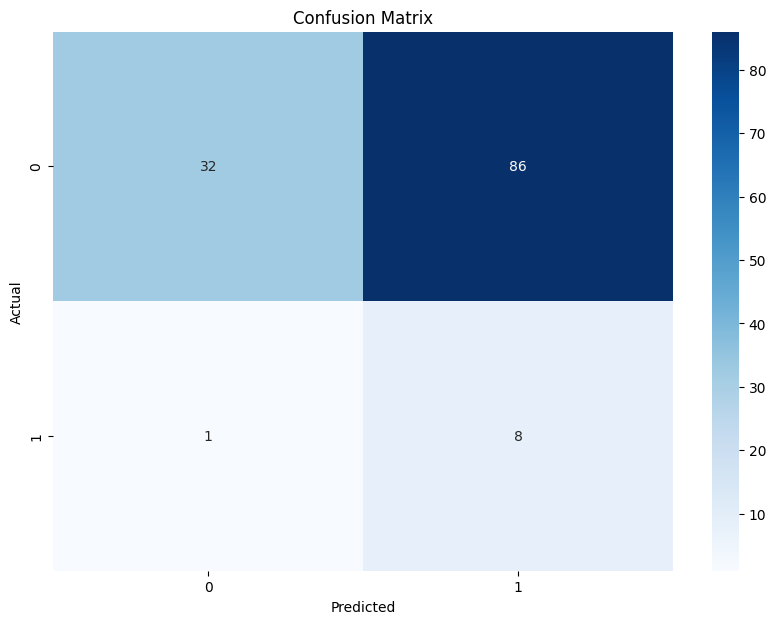

In [3]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Load your test data
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# Prepare the data for the request
data = {'X_test': X_test.tolist()}

# Send a request to the server
response = requests.post('http://0.0.0.0:5000/predict', json=data)
response_data = response.json()

# Verify the response keys
# print("Response keys:", response_data.keys())

# Process the response
predictions = np.array(response_data['predictions']).flatten()

# Print first 10 predictions and actual labels
# print("First 10 predictions:", predictions[:10])
# print("First 10 actual labels:", y_test[:10])

# Load the original parquet file with sequence mapping
input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_mapping_master_FINAL.parquet"
original_df = pd.read_parquet(input_file)

# Ensure Seq_Num is integer for proper merging
original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# Identify the first instance where Train_Test is 'Test'
seq_start = original_df[original_df['Train_Test'] == 'Test'].iloc[0]['Seq_Num']

# Create DataFrame for tracking and merging with additional information
tracking_data = []

for i in range(len(predictions)):
    total_seq_start = seq_start + i * 23
    total_seq_end = total_seq_start + 23 - 1
    source_seq_start = total_seq_start
    source_seq_end = source_seq_start + 20 - 1
    gap_seq_start = source_seq_end + 1
    gap_seq_end = gap_seq_start + 1
    prediction_seq_start = total_seq_end - 1
    prediction_seq_end = total_seq_end
    
    tracking_data.append([
        total_seq_start, total_seq_end, source_seq_start, source_seq_end,
        gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
        predictions[i], y_test[i]
    ])

tracking_df = pd.DataFrame(tracking_data, columns=[
    "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
    "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
    "Predicted", "Actual"
])

# Convert Source_Seq_Start to integer for proper merging
tracking_df['Source_Seq_Start'] = tracking_df['Source_Seq_Start'].astype(int)

# Merge with original data
merged_df = tracking_df.merge(original_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

# Display the first 30 columns of the new DataFrame
pd.set_option('display.max_columns', 30)
print("\nEnhanced Results:")
display(merged_df.iloc[:, :30])

# Calculate metrics
conf_matrix = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions, zero_division=0)
recall = recall_score(y_test, predictions, zero_division=0)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, zero_division=0)
tn, fp, fn, tp = conf_matrix.ravel()

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
    'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
})

# Print metrics DataFrame
print("\nMetrics:")
print(metrics_df)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

---

# <font color = pink> Model Eval from saved model (#72)
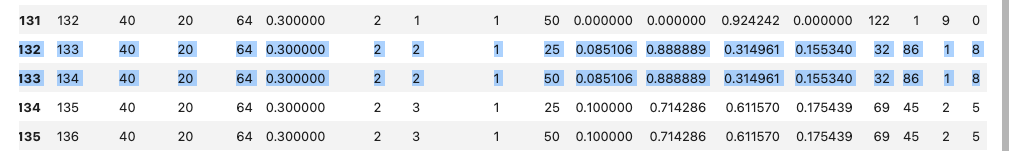

---